<h1>Project Team 7 
<h1>Project Topic - "Emotion Recognition Using Machine Learning"

<h3>Prepared by: FAHAD UR RAHAMAN
<h3>Student ID: 1001753107
<h3>Course: CSE-6363-004-MACHINE LEARNING

<h3>Code References made from the below websites:
    
<h5>[1]https://github.com/immersive-limit/coco-manager/blob/master/filter.py
<h5>[2]https://github.com/immersive-limit/coco-manager
<h5>[3]https://www.youtube.com/watch?v=HRtNM_eYaE4
<h5>[4]https://github.com/cocodataset/cocoapi/blob/master/PythonAPI/pycocoDemo.ipynb
<h5>[5]https://github.com/philferriere/cocoapi.git#egg=pycocotools&subdirectory=PythonAPI
<h5>[6]https://holypython.com/how-to-batch-resize-multiple-images-in-python-via-pil-library/#:~:text=You%20can%20resize%20multiple%20images,os%20(operating%20system)%20library.&text=By%20using%20os.,file%20names%20in%20a%20directory.&text=After%20that%2C%20all%20you%20have,each%20image%20in%20the%20directory.
<h5>[7]https://www.digitalocean.com/community/tutorials/how-to-use-break-continue-and-pass-statements-when-working-with-loops-in-python-3
<h5>[8]https://colab.research.google.com/drive/1DOvXJZRkjfKfF9oUpCZXSU3hPG3g1h-l?usp=sharing#scrollTo=qTsln3PG677f
<h5>[9]https://github.com/misbah4064/facial_expressions"
<h5>[10]http://www.paulvangent.com/2016/04/01/emotion-recognition-with-python-opencv-and-a-face-dataset/
<h5>[11]https://www.tutorialspoint.com/python_pillow/python_pillow_adding_filters_to_an_image.htm
<h5>[12]https://www.freecodecamp.org/news/getting-started-with-tesseract-part-ii-f7f9a0899b3f/

<h2> DATA COLLECTION AND DATA PRE-PROCESSING

In [1]:
import os
os.chdir("C:/Users/fahad/emotion_recognition/annotations")

In [2]:
%matplotlib inline
import os
import requests
from pycocotools.coco import COCO
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

<h2> Downloading COCO Dataset Images from "val2017" file

In [3]:
dataDir='..'
dataType='val2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [4]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=1.27s)
creating index...
index created!


In [5]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen person animal sports food accessory outdoor vehicle furniture appliance indoor electronic


In [6]:
# get all images containing given categories, select one at random
# 2693 images are found inside "val2017" file
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
images = coco.loadImgs(imgIds)
print("Number of images containing all the classes:", len(imgIds))

image_directory="~/annotations/cocoapi/images"

# imgIds = coco.getImgIds(imgIds = [324158])

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
image_path=os.path.join(image_directory,img["file_name"])

Number of images containing all the classes: 2693


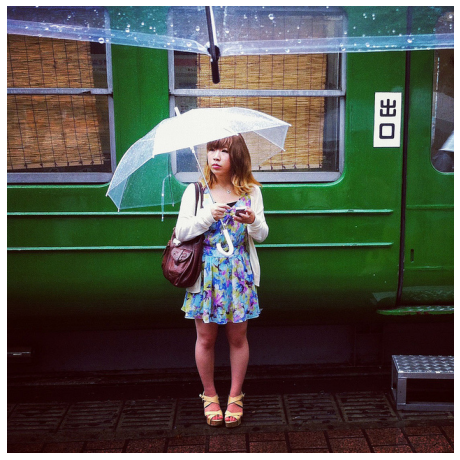

In [7]:
# load and display image
# I = io.imread('%s/images/%s/%s'%(dataDir,dataType,img['file_name']))
# use url to load image
I = io.imread(img['coco_url'])
plt.axis('off')
plt.imshow(I)
plt.show()

In [8]:
#Loading all 2693 images into the folder "Validation_images_download"
for im in images:
    #print("im: ", im)
    img_data = requests.get(im['coco_url']).content
    with open('C:/Users/fahad/emotion_recognition/Validation_images_download/' + im['file_name'], 'wb') as handler:
        handler.write(img_data)

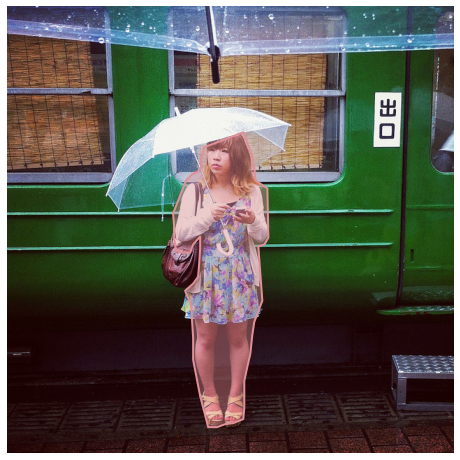

In [9]:
# load and display instance annotations
plt.imshow(I); plt.axis('off')
annIds = coco.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco.loadAnns(annIds)
coco.showAnns(anns)

In [10]:
# initialize COCO api for person keypoints annotations
annFile = '{}/annotations/person_keypoints_{}.json'.format(dataDir,dataType)
coco_kps=COCO(annFile)

loading annotations into memory...
Done (t=0.54s)
creating index...
index created!


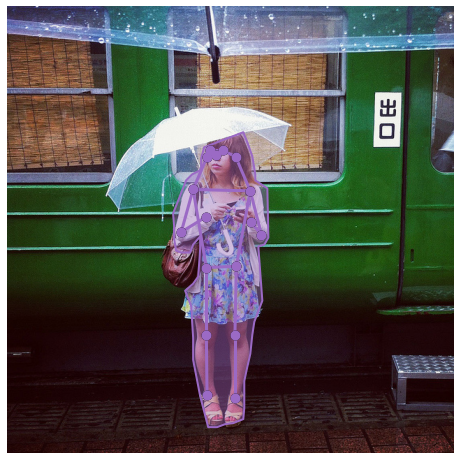

In [11]:
# load and display keypoints annotations
plt.imshow(I); plt.axis('off')
ax = plt.gca()
annIds = coco_kps.getAnnIds(imgIds=img['id'], catIds=catIds, iscrowd=None)
anns = coco_kps.loadAnns(annIds)
coco_kps.showAnns(anns)

In [12]:
# initialize COCO api for caption annotations
annFile = '{}/annotations/captions_{}.json'.format(dataDir,dataType)
coco_caps=COCO(annFile)

loading annotations into memory...
Done (t=0.19s)
creating index...
index created!


The young woman is standing in the rain under her umbrella 
A young lady under an umbrella by a train
A woman that is holding an umbrella near a building.
the girl is standing under a clear umbrella
a young woman is waiting in the rain


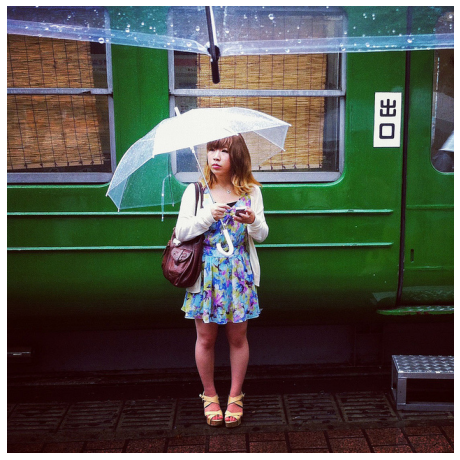

In [13]:
# load and display caption annotations
annIds = coco_caps.getAnnIds(imgIds=img['id']);
anns = coco_caps.loadAnns(annIds)
coco_caps.showAnns(anns)
plt.imshow(I); plt.axis('off'); plt.show()

<h2> Resizing all images to same image height and length from Validation folder

In [14]:
# resizing all the bulk images from the Validation_images folder
import PIL
import os
os.chdir("C:/Users/fahad/emotion_recognition/Validation_images_download/")
import os.path
from PIL import Image

f = r'C:/Users/fahad/emotion_recognition/Validation_images_download/'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((100,100))
    img.save(f_img)

<h2> Downloading COCO Dataset Images from "Train2017" file

In [15]:
dataDir='..'
dataType='Train2017'
annFile='{}/annotations/instances_{}.json'.format(dataDir,dataType)

In [16]:
# initialize COCO api for instance annotations
coco=COCO(annFile)

loading annotations into memory...
Done (t=25.93s)
creating index...
index created!


In [17]:
# display COCO categories and supercategories
cats = coco.loadCats(coco.getCatIds())
nms=[cat['name'] for cat in cats]
print('COCO categories: \n{}\n'.format(' '.join(nms)))

nms = set([cat['supercategory'] for cat in cats])
print('COCO supercategories: \n{}'.format(' '.join(nms)))

COCO categories: 
person bicycle car motorcycle airplane bus train truck boat traffic light fire hydrant stop sign parking meter bench bird cat dog horse sheep cow elephant bear zebra giraffe backpack umbrella handbag tie suitcase frisbee skis snowboard sports ball kite baseball bat baseball glove skateboard surfboard tennis racket bottle wine glass cup fork knife spoon bowl banana apple sandwich orange broccoli carrot hot dog pizza donut cake chair couch potted plant bed dining table toilet tv laptop mouse remote keyboard cell phone microwave oven toaster sink refrigerator book clock vase scissors teddy bear hair drier toothbrush

COCO supercategories: 
kitchen person animal sports food accessory outdoor vehicle furniture appliance indoor electronic


In [18]:
# get all images containing given categories, select one at random
# 64115 images are found inside "Train2017" file
catIds = coco.getCatIds(catNms=['person']);
imgIds = coco.getImgIds(catIds=catIds );
images = coco.loadImgs(imgIds)
print("Number of images containing all the classes:", len(imgIds))

image_directory="~/annotations/cocoapi/images"

# imgIds = coco.getImgIds(imgIds = [324158])

img = coco.loadImgs(imgIds[np.random.randint(0,len(imgIds))])[0]
image_path=os.path.join(image_directory,img["file_name"])

Number of images containing all the classes: 64115


In [19]:
#Loading images to a folder
#Downloading only 1000 images out of 64115 images from "Train2017" file
number = 0
for im in images:
    number = number + 1
        #print("im: ", im)
    img_data = requests.get(im['coco_url']).content
    with open('C:/Users/fahad/emotion_recognition/Train_images_download/' + im['file_name'], 'wb') as handler:
        handler.write(img_data)
    if number == 1000:
        break

<h2> Resizing all images to same image height and length from Training folder

In [20]:
# resizing all the bulk images from the Training_images folder
import PIL
import os
os.chdir("C:/Users/fahad/emotion_recognition/Train_images_download/")
import os.path
from PIL import Image

f = r'C:/Users/fahad/emotion_recognition/Train_images_download/'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((200,200))
    img.save(f_img)

<h2> Classifying Training Images based on each Emotion ("happy", "anger", "sad", "surprise", "neutral")

In [21]:
# Changing the directory to the below path
%cd "C:/Users/fahad/emotion_recognition/"

C:\Users\fahad\emotion_recognition


In [22]:
import os, sys
# Path to be created
path = "C:/Users/fahad/emotion_recognition/data_set"
os.mkdir( path);

In [23]:
#making directories for each label/Emotion

path1 = "C:/Users/fahad/emotion_recognition/data_set/anger"
os.mkdir(path1);

path2 = "C:/Users/fahad/emotion_recognition/data_set/happy"
os.mkdir(path2);

path3 = "C:/Users/fahad/emotion_recognition/data_set/neutral"
os.mkdir(path3);

path4 = "C:/Users/fahad/emotion_recognition/data_set/sad"
os.mkdir(path4);

path5 = "C:/Users/fahad/emotion_recognition/data_set/surprise"
os.mkdir(path5);

In [25]:
# Writing the all images from "Training_images" directory to "anger" directory based on "anger.txt" file
import cv2
with open('anger.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("Train_images/"+image)
    cv2.imwrite("data_set/anger/"+image,loadedImage)
print("done writing to anger folder")

done writing to anger folder


In [26]:
# Writing the all images from "Training_images" directory to "happy" directory based on "happy.txt" file
import cv2
with open('happy.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("Train_images/"+image)
    cv2.imwrite("data_set/happy/"+image,loadedImage)
print("done writing to happy folder")

done writing to happy folder


In [27]:
# Writing the all images from "Training_images" directory to "neutral" directory based on "neutral.txt" file
import cv2
with open('neutral.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("Train_images/"+image)
    cv2.imwrite("data_set/neutral/"+image,loadedImage)
print("done writing to neutral folder")

done writing to neutral folder


In [28]:
# Writing the all images from "Training_images" directory to "sad" directory based on "sad.txt" file
import cv2
with open('sad.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("Train_images/"+image)
    cv2.imwrite("data_set/sad/"+image,loadedImage)
print("done writing to sad folder")

done writing to sad folder


In [29]:
# Writing the all images from "Training_images" directory to "surprise" directory based on "surprise.txt" file
import cv2
with open('surprise.txt','r') as f:
    img = [line.strip() for line in f]
for image in img:
    loadedImage = cv2.imread("Train_images/"+image)
    cv2.imwrite("data_set/surprise/"+image,loadedImage)
print("done writing to surprise folder")

done writing to surprise folder


In [30]:
# Path to be created
path = "C:/Users/fahad/emotion_recognition/dataset"
os.mkdir( path);

In [31]:
os.chdir("C:/Users/fahad/emotion_recognition/")

<h2>Creating Data Set of Faces

In [32]:
import cv2

with open('anger.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each Emotion, enter one numeric face id
face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("C:/Users/fahad/emotion_recognition/data_set/anger/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        
        # Save the captured image into the datasets folder
        cv2.imwrite("C:/Users/fahad/emotion_recognition/dataset/" + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        
print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  0

 Done creating face data


In [33]:
import cv2

with open('happy.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each Emotion, enter one numeric face id
face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("C:/Users/fahad/emotion_recognition/data_set/happy/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        
        # Save the captured image into the datasets folder
        cv2.imwrite("C:/Users/fahad/emotion_recognition/dataset/" + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        
print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  1

 Done creating face data


In [34]:
import cv2

with open('neutral.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each Emotion, enter one numeric face id
face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("C:/Users/fahad/emotion_recognition/data_set/neutral/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        
        # Save the captured image into the datasets folder
        cv2.imwrite("C:/Users/fahad/emotion_recognition/dataset/" + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        
print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  2

 Done creating face data


In [35]:
import cv2

with open('sad.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each Emotion, enter one numeric face id
face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("C:/Users/fahad/emotion_recognition/data_set/sad/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        
        # Save the captured image into the datasets folder
        cv2.imwrite("C:/Users/fahad/emotion_recognition/dataset/" + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        
print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  3

 Done creating face data


In [36]:
import cv2

with open('surprise.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each Emotion, enter one numeric face id
face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("C:/Users/fahad/emotion_recognition/data_set/surprise/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        
        # Save the captured image into the datasets folder
        cv2.imwrite("C:/Users/fahad/emotion_recognition/dataset/" + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        
print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  4

 Done creating face data


<h1>Different Approaches / Techniques implemented to enhance Performance / Accuracy of the model

<h2>1. Resizing Images and saving the images to directory

In [37]:
# resizing all the bulk images from the Training_images folder
import PIL
import os
os.chdir("C:/Users/fahad/emotion_recognition/dataset/")
import os.path
from PIL import Image

f = r'C:/Users/fahad/emotion_recognition/dataset/'
for file in os.listdir(f):
    f_img = f+"/"+file
    img = Image.open(f_img)
    img = img.resize((200,200))
    img.save(f_img)

<h3>Reading images from directory

In [38]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.8)] #get first 80% of file list
    prediction = files[-int(len(files)*0.2):] #get last 20% of file list
    return training, prediction

<h3>Splitting the dataset into training and prediction sets

In [39]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

<h3>Recognition/Testing

In [40]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

<h3>Calculating the Accuracy of the Model

In [41]:
#Now run it
metascore = []
for i in range(0,10):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 493 images
size of prediction set is: 121 images
predicting classification set...
predicted 39.66942148760331 percent correct!

Training Fisher Face Classifier
size of training set is: 493 images
size of prediction set is: 121 images
predicting classification set...
predicted 37.1900826446281 percent correct!

Training Fisher Face Classifier
size of training set is: 493 images
size of prediction set is: 121 images
predicting classification set...
predicted 38.84297520661157 percent correct!

Training Fisher Face Classifier
size of training set is: 493 images
size of prediction set is: 121 images
predicting classification set...
predicted 41.32231404958678 percent correct!

Training Fisher Face Classifier
size of training set is: 493 images
size of prediction set is: 121 images
predicting classification set...
predicted 36.36363636363637 percent correct!

Training Fisher Face Classifier
size of training set is: 493 images
size of 

<h2>2. Rotating Images with different angles and saving them in directory

In [42]:
# pip install Pillow if you don't already have it

# import image utilities
from PIL import Image

# import os utilities
import os

f = r'C:/Users/fahad/emotion_recognition/2.dataset/'
    
# define a function that rotates images in the current directory
# given the rotation in degrees as a parameter

  # for each image in the listed directory
for file in os.listdir(f):
    for angle in (15, 125):
        f_img = f+"/"+file 
        # open the image
        img = Image.open(f_img)
        # rotate and save the image with the same filename
        img = img.rotate(angle)
        img.save(f_img.replace(".jpg", "_r{0}.jpg".format(angle)))

<h5>Dropping 1000 images to speed up the training and prediction process on local desktop

In [44]:
from random import sample
import os

files = os.listdir('C:/Users/fahad/emotion_recognition/2.dataset/')
for file in sample(files,1000):
    os.remove('C:/Users/fahad/emotion_recognition/2.dataset/'+file)

In [45]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/2.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.8)] #get first 80% of file list
    prediction = files[-int(len(files)*0.2):] #get last 20% of file list
    return training, prediction

In [46]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [47]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [48]:
#Now run it
metascore = []
for i in range(0,10):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 682 images
size of prediction set is: 168 images
predicting classification set...
predicted 32.73809523809524 percent correct!

Training Fisher Face Classifier
size of training set is: 682 images
size of prediction set is: 168 images
predicting classification set...
predicted 29.166666666666668 percent correct!

Training Fisher Face Classifier
size of training set is: 682 images
size of prediction set is: 168 images
predicting classification set...
predicted 33.92857142857143 percent correct!

Training Fisher Face Classifier
size of training set is: 682 images
size of prediction set is: 168 images
predicting classification set...
predicted 33.333333333333336 percent correct!

Training Fisher Face Classifier
size of training set is: 682 images
size of prediction set is: 168 images
predicting classification set...
predicted 27.976190476190474 percent correct!

Training Fisher Face Classifier
size of training set is: 682 images
size

<h2>3. Flipping Images - Flip images from LEFT to RIGHT

In [49]:
# pip install Pillow if you don't already have it

# import image utilities
from PIL import Image

# import os utilities
import os

f = r'C:/Users/fahad/emotion_recognition/3.dataset/'
    
# define a function that rotates images in the current directory
# given the rotation in degrees as a parameter

  # for each image in the listed directory
for file in os.listdir(f):
        f_img = f+"/"+file 
        # open the image
        img = Image.open(f_img)
        # rotate and save the image with the same filename
        img = img.transpose(Image.FLIP_LEFT_RIGHT)
        img.save(f_img)

In [50]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/3.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.8)] #get first 80% of file list
    prediction = files[-int(len(files)*0.2):] #get last 20% of file list
    return training, prediction

In [51]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [52]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [53]:
#Now run it
metascore = []
for i in range(0,10):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 41.88034188034188 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 41.02564102564103 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 37.60683760683761 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 39.31623931623932 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 40.17094017094017 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of

<h2>4. Flipping Images - Flip images from TOP to BOTTOM

In [54]:
# pip install Pillow if you don't already have it

# import image utilities
from PIL import Image

# import os utilities
import os

f = r'C:/Users/fahad/emotion_recognition/4.dataset/'
    
# define a function that rotates images in the current directory
# given the rotation in degrees as a parameter

  # for each image in the listed directory
for file in os.listdir(f):
        f_img = f+"/"+file 
        # open the image
        img = Image.open(f_img)
        # rotate and save the image with the same filename
        img = img.transpose(Image.FLIP_TOP_BOTTOM)
        img.save(f_img)

In [55]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/4.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.8)] #get first 80% of file list
    prediction = files[-int(len(files)*0.2):] #get last 20% of file list
    return training, prediction

In [56]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [57]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [58]:
#Now run it
metascore = []
for i in range(0,10):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 47.00854700854701 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 42.73504273504273 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 41.88034188034188 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 44.44444444444444 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of prediction set is: 117 images
predicting classification set...
predicted 43.58974358974359 percent correct!

Training Fisher Face Classifier
size of training set is: 479 images
size of

<h2>5. Enhance Image Sharpness

In [59]:
# pip install Pillow if you don't already have it

# import image utilities
from PIL import Image, ImageEnhance

# import os utilities
import os

f = r'C:/Users/fahad/emotion_recognition/5.dataset/'
factor = 5   
# define a function that rotates images in the current directory
# given the rotation in degrees as a parameter

  # for each image in the listed directory
for file in os.listdir(f):
        f_img = f+"/"+file 
        # open the image
        img = Image.open(f_img)
        enhancer = ImageEnhance.Sharpness(img)
        # rotate and save the image with the same filename
        img = enhancer.enhance(factor)
        img.save(f_img)

In [60]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/5.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.9)] #get first 80% of file list
    prediction = files[-int(len(files)*0.1):] #get last 20% of file list
    return training, prediction

In [61]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [62]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [63]:
#Now run it
metascore = []
for i in range(0,5):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 42.10526315789474 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 42.10526315789474 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 38.59649122807018 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 24.56140350877193 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 45.6140350877193 percent correct!


Final Mean Accuracy Score: 38.59649122807018 percent correct!


<h2>6. Gaussian blur filter

In [64]:
# pip install Pillow if you don't already have it

# import image utilities
from PIL import Image, ImageFilter

# import os utilities
import os

f = r'C:/Users/fahad/emotion_recognition/6.dataset/'  
# define a function that rotates images in the current directory
# given the rotation in degrees as a parameter

  # for each image in the listed directory
for file in os.listdir(f):
        f_img = f+"/"+file 
        # open the image
        img = Image.open(f_img)
        img = img.filter(ImageFilter.GaussianBlur(radius=7))
        img.save(f_img)

In [65]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/6.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.9)] #get first 80% of file list
    prediction = files[-int(len(files)*0.1):] #get last 20% of file list
    return training, prediction

In [66]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [67]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [68]:
#Now run it
metascore = []
for i in range(0,5):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 40.35087719298246 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 42.10526315789474 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 45.6140350877193 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 42.10526315789474 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 43.85964912280702 percent correct!


Final Mean Accuracy Score: 42.80701754385965 percent correct!


<h2>7. Kernel Image Filter - Create a convolution kernel. The current version only supports 3x3 and 5x5 integer and floating point kernels

In [69]:
# pip install Pillow if you don't already have it

# import image utilities
from PIL import Image, ImageFilter

# import os utilities
import os

f = r'C:/Users/fahad/emotion_recognition/7.dataset/'  
# define a function that rotates images in the current directory
# given the rotation in degrees as a parameter

  # for each image in the listed directory
for file in os.listdir(f):
        f_img = f+"/"+file 
        # open the image
        img = Image.open(f_img)
        img = img.filter(ImageFilter.Kernel((3, 3), (-1, -1, -1, -1, 9, -1, -1, -1, -1), 1, 0)) 
        img.save(f_img)

In [70]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/7.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.9)] #get first 80% of file list
    prediction = files[-int(len(files)*0.1):] #get last 20% of file list
    return training, prediction

In [71]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [72]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [73]:
#Now run it
metascore = []
for i in range(0,5):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 36.8421052631579 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 42.10526315789474 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 43.85964912280702 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 36.8421052631579 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 43.85964912280702 percent correct!


Final Mean Accuracy Score: 40.70175438596491 percent correct!


<h2>8. Image Filter to Blur, Smooth, Sharpen, etc

In [74]:
# pip install Pillow if you don't already have it

# import image utilities
from PIL import Image, ImageFilter
import filter

# import os utilities
import os

from PIL.ImageFilter import (
   BLUR, CONTOUR, DETAIL, EDGE_ENHANCE, EDGE_ENHANCE_MORE,
   EMBOSS, FIND_EDGES, SMOOTH, SMOOTH_MORE, SHARPEN
)

f = r'C:/Users/fahad/emotion_recognition/8.dataset/'  
# define a function that rotates images in the current directory
# given the rotation in degrees as a parameter

  # for each image in the listed directory
for file in os.listdir(f):
        f_img = f+"/"+file 
        # open the image
        img = Image.open(f_img)
        img = img.filter(EDGE_ENHANCE)
        img.save(f_img)

In [75]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/8.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.9)] #get first 80% of file list
    prediction = files[-int(len(files)*0.1):] #get last 20% of file list
    return training, prediction

In [76]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [77]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [78]:
#Now run it
metascore = []
for i in range(0,5):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 29.82456140350877 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 40.35087719298246 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 38.59649122807018 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 36.8421052631579 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 54.3859649122807 percent correct!


Final Mean Accuracy Score: 40.0 percent correct!


<h2>9. Bilateral filtering</h2><br>
<h7>Speaking of keeping edges sharp, bilateral filtering is quite useful for removing the noise without smoothing the edges. Similar to gaussian blurring, bilateral filtering also uses a gaussian filter to find the gaussian weighted average in the neighborhood. However, it also takes pixel difference into account while blurring the nearby pixels.
Thus, it ensures only those pixels with similar intensity to the central pixel are blurred, whereas the pixels with distinct pixel values are not blurred. In doing so, the edges that have larger intensity variation, so-called edges, are preserved.

In [79]:
path = r'C:/Users/fahad/emotion_recognition/9.dataset/*.*'

for (i, file) in enumerate (glob.glob(path)):
    img = cv2.imread(file)
    bilateral = cv2.bilateralFilter(img,15,75,75)
    print(bilateral)
    cv2.imwrite(file, bilateral)

[[[40 40 40]
  [40 40 40]
  [41 41 41]
  ...
  [27 27 27]
  [28 28 28]
  [28 28 28]]

 [[40 40 40]
  [41 41 41]
  [41 41 41]
  ...
  [27 27 27]
  [28 28 28]
  [28 28 28]]

 [[41 41 41]
  [41 41 41]
  [42 42 42]
  ...
  [27 27 27]
  [28 28 28]
  [28 28 28]]

 ...

 [[74 74 74]
  [74 74 74]
  [73 73 73]
  ...
  [29 29 29]
  [29 29 29]
  [30 30 30]]

 [[74 74 74]
  [74 74 74]
  [73 73 73]
  ...
  [28 28 28]
  [29 29 29]
  [29 29 29]]

 [[75 75 75]
  [74 74 74]
  [73 73 73]
  ...
  [28 28 28]
  [28 28 28]
  [29 29 29]]]
[[[ 57  57  57]
  [ 58  58  58]
  [ 59  59  59]
  ...
  [137 137 137]
  [138 138 138]
  [138 138 138]]

 [[ 58  58  58]
  [ 58  58  58]
  [ 60  60  60]
  ...
  [137 137 137]
  [138 138 138]
  [138 138 138]]

 [[ 58  58  58]
  [ 59  59  59]
  [ 61  61  61]
  ...
  [137 137 137]
  [138 138 138]
  [138 138 138]]

 ...

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  [ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]]

 [[ 41  41  41]
  [ 41  41  41]
  [ 41  41  41]
  ...
  

[[[ 34  34  34]
  [ 34  34  34]
  [ 35  35  35]
  ...
  [144 144 144]
  [143 143 143]
  [143 143 143]]

 [[ 34  34  34]
  [ 34  34  34]
  [ 35  35  35]
  ...
  [144 144 144]
  [144 144 144]
  [143 143 143]]

 [[ 34  34  34]
  [ 34  34  34]
  [ 35  35  35]
  ...
  [145 145 145]
  [144 144 144]
  [144 144 144]]

 ...

 [[ 49  49  49]
  [ 49  49  49]
  [ 49  49  49]
  ...
  [182 182 182]
  [182 182 182]
  [182 182 182]]

 [[ 49  49  49]
  [ 49  49  49]
  [ 49  49  49]
  ...
  [182 182 182]
  [182 182 182]
  [181 181 181]]

 [[ 49  49  49]
  [ 49  49  49]
  [ 49  49  49]
  ...
  [182 182 182]
  [182 182 182]
  [181 181 181]]]
[[[51 51 51]
  [51 51 51]
  [52 52 52]
  ...
  [48 48 48]
  [50 50 50]
  [51 51 51]]

 [[51 51 51]
  [51 51 51]
  [51 51 51]
  ...
  [49 49 49]
  [50 50 50]
  [51 51 51]]

 [[51 51 51]
  [51 51 51]
  [51 51 51]
  ...
  [49 49 49]
  [51 51 51]
  [51 51 51]]

 ...

 [[77 77 77]
  [78 78 78]
  [80 80 80]
  ...
  [31 31 31]
  [32 32 32]
  [32 32 32]]

 [[76 76 76]
  [78 7

[[[231 231 231]
  [232 232 232]
  [233 233 233]
  ...
  [ 69  69  69]
  [ 70  70  70]
  [ 70  70  70]]

 [[231 231 231]
  [233 233 233]
  [233 233 233]
  ...
  [ 69  69  69]
  [ 70  70  70]
  [ 70  70  70]]

 [[232 232 232]
  [233 233 233]
  [232 232 232]
  ...
  [ 69  69  69]
  [ 70  70  70]
  [ 70  70  70]]

 ...

 [[ 75  75  75]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [ 30  30  30]
  [ 30  30  30]
  [ 31  31  31]]

 [[ 75  75  75]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [ 30  30  30]
  [ 30  30  30]
  [ 31  31  31]]

 [[ 75  75  75]
  [ 75  75  75]
  [ 75  75  75]
  ...
  [ 30  30  30]
  [ 31  31  31]
  [ 31  31  31]]]
[[[ 73  73  73]
  [ 73  73  73]
  [ 73  73  73]
  ...
  [139 139 139]
  [139 139 139]
  [139 139 139]]

 [[ 73  73  73]
  [ 73  73  73]
  [ 73  73  73]
  ...
  [140 140 140]
  [139 139 139]
  [139 139 139]]

 [[ 73  73  73]
  [ 73  73  73]
  [ 73  73  73]
  ...
  [140 140 140]
  [140 140 140]
  [139 139 139]]

 ...

 [[ 54  54  54]
  [ 54  54  54]
  [ 54  54  54]
  ..

[[[83 83 83]
  [83 83 83]
  [83 83 83]
  ...
  [37 37 37]
  [36 36 36]
  [36 36 36]]

 [[83 83 83]
  [83 83 83]
  [83 83 83]
  ...
  [37 37 37]
  [37 37 37]
  [36 36 36]]

 [[83 83 83]
  [83 83 83]
  [83 83 83]
  ...
  [37 37 37]
  [37 37 37]
  [37 37 37]]

 ...

 [[87 87 87]
  [87 87 87]
  [87 87 87]
  ...
  [99 99 99]
  [99 99 99]
  [99 99 99]]

 [[87 87 87]
  [87 87 87]
  [87 87 87]
  ...
  [98 98 98]
  [98 98 98]
  [98 98 98]]

 [[87 87 87]
  [87 87 87]
  [87 87 87]
  ...
  [98 98 98]
  [98 98 98]
  [97 97 97]]]
[[[212 212 212]
  [212 212 212]
  [211 211 211]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]]

 [[211 211 211]
  [211 211 211]
  [211 211 211]
  ...
  [ 59  59  59]
  [ 58  58  58]
  [ 58  58  58]]

 [[210 210 210]
  [210 210 210]
  [210 210 210]
  ...
  [ 58  58  58]
  [ 58  58  58]
  [ 58  58  58]]

 ...

 [[143 143 143]
  [143 143 143]
  [143 143 143]
  ...
  [ 54  54  54]
  [ 53  53  53]
  [ 53  53  53]]

 [[143 143 143]
  [143 143 143]
  [143 143 143]
  ...
  

[[[170 170 170]
  [170 170 170]
  [170 170 170]
  ...
  [135 135 135]
  [135 135 135]
  [135 135 135]]

 [[170 170 170]
  [170 170 170]
  [170 170 170]
  ...
  [135 135 135]
  [135 135 135]
  [135 135 135]]

 [[170 170 170]
  [170 170 170]
  [170 170 170]
  ...
  [135 135 135]
  [135 135 135]
  [135 135 135]]

 ...

 [[149 149 149]
  [149 149 149]
  [149 149 149]
  ...
  [ 81  81  81]
  [ 79  79  79]
  [ 77  77  77]]

 [[149 149 149]
  [149 149 149]
  [149 149 149]
  ...
  [ 79  79  79]
  [ 78  78  78]
  [ 77  77  77]]

 [[149 149 149]
  [149 149 149]
  [149 149 149]
  ...
  [ 78  78  78]
  [ 78  78  78]
  [ 77  77  77]]]
[[[ 19  19  19]
  [ 19  19  19]
  [ 18  18  18]
  ...
  [ 22  22  22]
  [ 21  21  21]
  [ 21  21  21]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 22  22  22]
  [ 21  21  21]
  [ 21  21  21]]

 [[ 19  19  19]
  [ 19  19  19]
  [ 19  19  19]
  ...
  [ 22  22  22]
  [ 21  21  21]
  [ 21  21  21]]

 ...

 [[155 155 155]
  [157 157 157]
  [159 159 159]
  ..

  [ 64  64  64]]]
[[[58 58 58]
  [58 58 58]
  [58 58 58]
  ...
  [12 12 12]
  [12 12 12]
  [12 12 12]]

 [[58 58 58]
  [58 58 58]
  [58 58 58]
  ...
  [12 12 12]
  [12 12 12]
  [12 12 12]]

 [[58 58 58]
  [58 58 58]
  [58 58 58]
  ...
  [12 12 12]
  [12 12 12]
  [12 12 12]]

 ...

 [[74 74 74]
  [74 74 74]
  [73 73 73]
  ...
  [74 74 74]
  [74 74 74]
  [74 74 74]]

 [[74 74 74]
  [74 74 74]
  [73 73 73]
  ...
  [74 74 74]
  [74 74 74]
  [74 74 74]]

 [[74 74 74]
  [74 74 74]
  [73 73 73]
  ...
  [74 74 74]
  [74 74 74]
  [74 74 74]]]
[[[23 23 23]
  [23 23 23]
  [23 23 23]
  ...
  [63 63 63]
  [64 64 64]
  [65 65 65]]

 [[23 23 23]
  [23 23 23]
  [23 23 23]
  ...
  [63 63 63]
  [64 64 64]
  [64 64 64]]

 [[23 23 23]
  [23 23 23]
  [23 23 23]
  ...
  [63 63 63]
  [64 64 64]
  [64 64 64]]

 ...

 [[83 83 83]
  [84 84 84]
  [84 84 84]
  ...
  [78 78 78]
  [79 79 79]
  [79 79 79]]

 [[83 83 83]
  [84 84 84]
  [84 84 84]
  ...
  [78 78 78]
  [79 79 79]
  [79 79 79]]

 [[83 83 83]
  [84 84 84

  [ 41  41  41]]]
[[[148 148 148]
  [148 148 148]
  [147 147 147]
  ...
  [126 126 126]
  [127 127 127]
  [127 127 127]]

 [[148 148 148]
  [148 148 148]
  [147 147 147]
  ...
  [126 126 126]
  [127 127 127]
  [127 127 127]]

 [[148 148 148]
  [148 148 148]
  [148 148 148]
  ...
  [127 127 127]
  [127 127 127]
  [127 127 127]]

 ...

 [[158 158 158]
  [136 136 136]
  [120 120 120]
  ...
  [ 77  77  77]
  [ 77  77  77]
  [ 77  77  77]]

 [[171 171 171]
  [152 152 152]
  [128 128 128]
  ...
  [ 77  77  77]
  [ 77  77  77]
  [ 77  77  77]]

 [[177 177 177]
  [163 163 163]
  [136 136 136]
  ...
  [ 77  77  77]
  [ 77  77  77]
  [ 77  77  77]]]
[[[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]
  ...
  [42 42 42]
  [42 42 42]
  [42 42 42]]

 [[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]
  ...
  [42 42 42]
  [42 42 42]
  [42 42 42]]

 [[ 9  9  9]
  [ 9  9  9]
  [ 9  9  9]
  ...
  [42 42 42]
  [42 42 42]
  [42 42 42]]

 ...

 [[20 20 20]
  [20 20 20]
  [20 20 20]
  ...
  [13 13 13]
  [13 13 13]
  [13 13 13]]

 [

[[[163 163 163]
  [152 152 152]
  [105 105 105]
  ...
  [119 119 119]
  [116 116 116]
  [114 114 114]]

 [[161 161 161]
  [146 146 146]
  [ 99  99  99]
  ...
  [133 133 133]
  [129 129 129]
  [128 128 128]]

 [[164 164 164]
  [137 137 137]
  [ 67  67  67]
  ...
  [149 149 149]
  [154 154 154]
  [160 160 160]]

 ...

 [[119 119 119]
  [123 123 123]
  [127 127 127]
  ...
  [ 81  81  81]
  [ 65  65  65]
  [ 51  51  51]]

 [[125 125 125]
  [125 125 125]
  [128 128 128]
  ...
  [ 67  67  67]
  [ 60  60  60]
  [ 51  51  51]]

 [[129 129 129]
  [127 127 127]
  [129 129 129]
  ...
  [ 55  55  55]
  [ 55  55  55]
  [ 51  51  51]]]
[[[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [80 80 80]
  [83 83 83]
  [85 85 85]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [84 84 84]
  [87 87 87]
  [89 89 89]]

 [[50 50 50]
  [50 50 50]
  [50 50 50]
  ...
  [85 85 85]
  [89 89 89]
  [92 92 92]]

 ...

 [[94 94 94]
  [94 94 94]
  [94 94 94]
  ...
  [53 53 53]
  [53 53 53]
  [53 53 53]]

 [[94 94 94]
  [94 9

  [116 116 116]]]
[[[95 95 95]
  [95 95 95]
  [96 96 96]
  ...
  [50 50 50]
  [50 50 50]
  [50 50 50]]

 [[95 95 95]
  [95 95 95]
  [96 96 96]
  ...
  [51 51 51]
  [51 51 51]
  [51 51 51]]

 [[94 94 94]
  [94 94 94]
  [95 95 95]
  ...
  [54 54 54]
  [52 52 52]
  [51 51 51]]

 ...

 [[49 49 49]
  [49 49 49]
  [49 49 49]
  ...
  [31 31 31]
  [30 30 30]
  [30 30 30]]

 [[48 48 48]
  [48 48 48]
  [49 49 49]
  ...
  [31 31 31]
  [30 30 30]
  [30 30 30]]

 [[48 48 48]
  [48 48 48]
  [49 49 49]
  ...
  [31 31 31]
  [30 30 30]
  [30 30 30]]]
[[[93 93 93]
  [93 93 93]
  [94 94 94]
  ...
  [ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]]

 [[93 93 93]
  [93 93 93]
  [94 94 94]
  ...
  [ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]]

 [[94 94 94]
  [94 94 94]
  [95 95 95]
  ...
  [ 2  2  2]
  [ 2  2  2]
  [ 2  2  2]]

 ...

 [[56 56 56]
  [56 56 56]
  [56 56 56]
  ...
  [24 24 24]
  [24 24 24]
  [24 24 24]]

 [[55 55 55]
  [55 55 55]
  [56 56 56]
  ...
  [24 24 24]
  [24 24 24]
  [24 24 24]]

 [[55 55 55]
  [55 55 55

[[[ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]
  ...
  [ 21  21  21]
  [ 20  20  20]
  [ 20  20  20]]

 [[ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]
  ...
  [ 21  21  21]
  [ 20  20  20]
  [ 20  20  20]]

 [[ 34  34  34]
  [ 34  34  34]
  [ 34  34  34]
  ...
  [ 20  20  20]
  [ 19  19  19]
  [ 19  19  19]]

 ...

 [[174 174 174]
  [174 174 174]
  [174 174 174]
  ...
  [153 153 153]
  [153 153 153]
  [152 152 152]]

 [[174 174 174]
  [174 174 174]
  [174 174 174]
  ...
  [153 153 153]
  [153 153 153]
  [153 153 153]]

 [[174 174 174]
  [174 174 174]
  [174 174 174]
  ...
  [154 154 154]
  [153 153 153]
  [153 153 153]]]
[[[29 29 29]
  [29 29 29]
  [30 30 30]
  ...
  [52 52 52]
  [50 50 50]
  [50 50 50]]

 [[29 29 29]
  [29 29 29]
  [30 30 30]
  ...
  [52 52 52]
  [51 51 51]
  [50 50 50]]

 [[29 29 29]
  [29 29 29]
  [30 30 30]
  ...
  [53 53 53]
  [51 51 51]
  [50 50 50]]

 ...

 [[24 24 24]
  [24 24 24]
  [24 24 24]
  ...
  [19 19 19]
  [19 19 19]
  [19 19 19]]

 [[24 24 24]
  [24 2

[[[ 83  83  83]
  [ 84  84  84]
  [ 85  85  85]
  ...
  [109 109 109]
  [106 106 106]
  [106 106 106]]

 [[ 83  83  83]
  [ 83  83  83]
  [ 85  85  85]
  ...
  [112 112 112]
  [109 109 109]
  [107 107 107]]

 [[ 82  82  82]
  [ 82  82  82]
  [ 83  83  83]
  ...
  [119 119 119]
  [113 113 113]
  [110 110 110]]

 ...

 [[ 16  16  16]
  [ 16  16  16]
  [ 16  16  16]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]]

 [[ 16  16  16]
  [ 16  16  16]
  [ 16  16  16]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]]

 [[ 16  16  16]
  [ 16  16  16]
  [ 16  16  16]
  ...
  [ 59  59  59]
  [ 59  59  59]
  [ 59  59  59]]]
[[[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ...
  [ 13  13  13]
  [ 13  13  13]
  [ 13  13  13]]

 [[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ...
  [ 13  13  13]
  [ 13  13  13]
  [ 13  13  13]]

 [[ 12  12  12]
  [ 12  12  12]
  [ 12  12  12]
  ...
  [ 13  13  13]
  [ 13  13  13]
  [ 13  13  13]]

 ...

 [[190 190 190]
  [188 188 188]
  [185 185 185]
  ..

[[[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 90  90  90]
  [ 89  89  89]
  [ 89  89  89]]

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 90  90  90]
  [ 89  89  89]
  [ 89  89  89]]

 [[ 10  10  10]
  [ 10  10  10]
  [ 10  10  10]
  ...
  [ 91  91  91]
  [ 90  90  90]
  [ 90  90  90]]

 ...

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [184 184 184]
  [184 184 184]
  [184 184 184]]

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [184 184 184]
  [184 184 184]
  [184 184 184]]

 [[  7   7   7]
  [  7   7   7]
  [  7   7   7]
  ...
  [184 184 184]
  [184 184 184]
  [184 184 184]]]
[[[231 231 231]
  [231 231 231]
  [231 231 231]
  ...
  [ 57  57  57]
  [ 56  56  56]
  [ 55  55  55]]

 [[231 231 231]
  [231 231 231]
  [231 231 231]
  ...
  [ 57  57  57]
  [ 56  56  56]
  [ 56  56  56]]

 [[231 231 231]
  [231 231 231]
  [232 232 232]
  ...
  [ 57  57  57]
  [ 56  56  56]
  [ 56  56  56]]

 ...

 [[ 30  30  30]
  [ 30  30  30]
  [ 28  28  28]
  ..

[[[ 62  62  62]
  [ 62  62  62]
  [ 63  63  63]
  ...
  [ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]]

 [[ 62  62  62]
  [ 62  62  62]
  [ 63  63  63]
  ...
  [ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]]

 [[ 62  62  62]
  [ 63  63  63]
  [ 63  63  63]
  ...
  [ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]]

 ...

 [[ 99  99  99]
  [ 99  99  99]
  [ 98  98  98]
  ...
  [ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]]

 [[100 100 100]
  [ 99  99  99]
  [ 99  99  99]
  ...
  [ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]]

 [[100 100 100]
  [100 100 100]
  [ 99  99  99]
  ...
  [ 26  26  26]
  [ 26  26  26]
  [ 26  26  26]]]
[[[55 55 55]
  [55 55 55]
  [54 54 54]
  ...
  [24 24 24]
  [25 25 25]
  [25 25 25]]

 [[55 55 55]
  [55 55 55]
  [54 54 54]
  ...
  [24 24 24]
  [24 24 24]
  [25 25 25]]

 [[55 55 55]
  [54 54 54]
  [54 54 54]
  ...
  [24 24 24]
  [24 24 24]
  [24 24 24]]

 ...

 [[72 72 72]
  [72 72 72]
  [72 72 72]
  ...
  [ 5  5  5]
  [ 5  5  5]
  [ 5  5  5]]

 [[73 73 73]
  [73 7

[[[ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]
  ...
  [ 54  54  54]
  [ 54  54  54]
  [ 54  54  54]]

 [[ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]
  ...
  [ 54  54  54]
  [ 53  53  53]
  [ 54  54  54]]

 [[ 60  60  60]
  [ 60  60  60]
  [ 60  60  60]
  ...
  [ 54  54  54]
  [ 53  53  53]
  [ 53  53  53]]

 ...

 [[136 136 136]
  [135 135 135]
  [131 131 131]
  ...
  [ 89  89  89]
  [ 91  91  91]
  [ 94  94  94]]

 [[136 136 136]
  [135 135 135]
  [133 133 133]
  ...
  [ 89  89  89]
  [ 92  92  92]
  [ 94  94  94]]

 [[136 136 136]
  [136 136 136]
  [134 134 134]
  ...
  [ 89  89  89]
  [ 92  92  92]
  [ 94  94  94]]]
[[[ 43  43  43]
  [ 44  44  44]
  [ 45  45  45]
  ...
  [ 23  23  23]
  [ 23  23  23]
  [ 23  23  23]]

 [[ 43  43  43]
  [ 44  44  44]
  [ 45  45  45]
  ...
  [ 23  23  23]
  [ 23  23  23]
  [ 23  23  23]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 45  45  45]
  ...
  [ 24  24  24]
  [ 23  23  23]
  [ 23  23  23]]

 ...

 [[157 157 157]
  [157 157 157]
  [157 157 157]
  ..

  [  9   9   9]]]
[[[112 112 112]
  [111 111 111]
  [111 111 111]
  ...
  [ 92  92  92]
  [ 90  90  90]
  [ 89  89  89]]

 [[111 111 111]
  [111 111 111]
  [111 111 111]
  ...
  [ 92  92  92]
  [ 90  90  90]
  [ 89  89  89]]

 [[111 111 111]
  [111 111 111]
  [112 112 112]
  ...
  [ 91  91  91]
  [ 90  90  90]
  [ 89  89  89]]

 ...

 [[ 42  42  42]
  [ 44  44  44]
  [ 49  49  49]
  ...
  [ 94  94  94]
  [ 94  94  94]
  [ 94  94  94]]

 [[ 52  52  52]
  [ 55  55  55]
  [ 58  58  58]
  ...
  [ 94  94  94]
  [ 94  94  94]
  [ 94  94  94]]

 [[ 58  58  58]
  [ 60  60  60]
  [ 63  63  63]
  ...
  [ 94  94  94]
  [ 94  94  94]
  [ 93  93  93]]]
[[[107 107 107]
  [107 107 107]
  [106 106 106]
  ...
  [ 55  55  55]
  [ 55  55  55]
  [ 55  55  55]]

 [[107 107 107]
  [107 107 107]
  [106 106 106]
  ...
  [ 54  54  54]
  [ 55  55  55]
  [ 55  55  55]]

 [[107 107 107]
  [107 107 107]
  [106 106 106]
  ...
  [ 53  53  53]
  [ 54  54  54]
  [ 54  54  54]]

 ...

 [[ 66  66  66]
  [ 66  66  66]
  

[[[ 36  36  36]
  [ 37  37  37]
  [ 38  38  38]
  ...
  [187 187 187]
  [186 186 186]
  [185 185 185]]

 [[ 37  37  37]
  [ 37  37  37]
  [ 38  38  38]
  ...
  [187 187 187]
  [186 186 186]
  [185 185 185]]

 [[ 38  38  38]
  [ 38  38  38]
  [ 39  39  39]
  ...
  [186 186 186]
  [185 185 185]
  [184 184 184]]

 ...

 [[ 70  70  70]
  [ 70  70  70]
  [ 71  71  71]
  ...
  [214 214 214]
  [214 214 214]
  [214 214 214]]

 [[ 69  69  69]
  [ 70  70  70]
  [ 70  70  70]
  ...
  [214 214 214]
  [214 214 214]
  [214 214 214]]

 [[ 69  69  69]
  [ 70  70  70]
  [ 70  70  70]
  ...
  [214 214 214]
  [214 214 214]
  [214 214 214]]]
[[[14 14 14]
  [14 14 14]
  [14 14 14]
  ...
  [52 52 52]
  [53 53 53]
  [53 53 53]]

 [[13 13 13]
  [14 14 14]
  [14 14 14]
  ...
  [52 52 52]
  [53 53 53]
  [53 53 53]]

 [[14 14 14]
  [14 14 14]
  [14 14 14]
  ...
  [52 52 52]
  [53 53 53]
  [53 53 53]]

 ...

 [[61 61 61]
  [61 61 61]
  [61 61 61]
  ...
  [60 60 60]
  [59 59 59]
  [57 57 57]]

 [[60 60 60]
  [60 6

[[[ 65  65  65]
  [ 65  65  65]
  [ 66  66  66]
  ...
  [ 48  48  48]
  [ 48  48  48]
  [ 48  48  48]]

 [[ 65  65  65]
  [ 66  66  66]
  [ 66  66  66]
  ...
  [ 48  48  48]
  [ 48  48  48]
  [ 48  48  48]]

 [[ 66  66  66]
  [ 66  66  66]
  [ 66  66  66]
  ...
  [ 47  47  47]
  [ 47  47  47]
  [ 48  48  48]]

 ...

 [[122 122 122]
  [128 128 128]
  [133 133 133]
  ...
  [ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]]

 [[115 115 115]
  [123 123 123]
  [130 130 130]
  ...
  [ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]]

 [[111 111 111]
  [120 120 120]
  [128 128 128]
  ...
  [ 20  20  20]
  [ 20  20  20]
  [ 20  20  20]]]
[[[113 113 113]
  [116 116 116]
  [121 121 121]
  ...
  [ 95  95  95]
  [ 95  95  95]
  [ 95  95  95]]

 [[114 114 114]
  [117 117 117]
  [120 120 120]
  ...
  [ 95  95  95]
  [ 95  95  95]
  [ 95  95  95]]

 [[116 116 116]
  [118 118 118]
  [119 119 119]
  ...
  [ 95  95  95]
  [ 95  95  95]
  [ 95  95  95]]

 ...

 [[177 177 177]
  [179 179 179]
  [180 180 180]
  ..

[[[199 199 199]
  [199 199 199]
  [198 198 198]
  ...
  [116 116 116]
  [125 125 125]
  [130 130 130]]

 [[199 199 199]
  [199 199 199]
  [198 198 198]
  ...
  [116 116 116]
  [125 125 125]
  [130 130 130]]

 [[200 200 200]
  [199 199 199]
  [198 198 198]
  ...
  [117 117 117]
  [126 126 126]
  [130 130 130]]

 ...

 [[198 198 198]
  [196 196 196]
  [192 192 192]
  ...
  [ 74  74  74]
  [ 75  75  75]
  [ 75  75  75]]

 [[198 198 198]
  [196 196 196]
  [194 194 194]
  ...
  [ 75  75  75]
  [ 75  75  75]
  [ 76  76  76]]

 [[198 198 198]
  [197 197 197]
  [196 196 196]
  ...
  [ 75  75  75]
  [ 76  76  76]
  [ 76  76  76]]]
[[[ 69  69  69]
  [ 69  69  69]
  [ 69  69  69]
  ...
  [118 118 118]
  [118 118 118]
  [118 118 118]]

 [[ 69  69  69]
  [ 69  69  69]
  [ 69  69  69]
  ...
  [118 118 118]
  [118 118 118]
  [118 118 118]]

 [[ 69  69  69]
  [ 69  69  69]
  [ 69  69  69]
  ...
  [119 119 119]
  [119 119 119]
  [119 119 119]]

 ...

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ..

[[[ 70  70  70]
  [ 71  71  71]
  [ 71  71  71]
  ...
  [202 202 202]
  [200 200 200]
  [198 198 198]]

 [[ 71  71  71]
  [ 71  71  71]
  [ 72  72  72]
  ...
  [201 201 201]
  [199 199 199]
  [198 198 198]]

 [[ 72  72  72]
  [ 72  72  72]
  [ 73  73  73]
  ...
  [200 200 200]
  [198 198 198]
  [197 197 197]]

 ...

 [[125 125 125]
  [125 125 125]
  [126 126 126]
  ...
  [226 226 226]
  [227 227 227]
  [227 227 227]]

 [[126 126 126]
  [126 126 126]
  [126 126 126]
  ...
  [226 226 226]
  [227 227 227]
  [227 227 227]]

 [[126 126 126]
  [126 126 126]
  [126 126 126]
  ...
  [226 226 226]
  [227 227 227]
  [227 227 227]]]
[[[ 38  38  38]
  [ 38  38  38]
  [ 39  39  39]
  ...
  [ 72  72  72]
  [ 73  73  73]
  [ 73  73  73]]

 [[ 38  38  38]
  [ 38  38  38]
  [ 39  39  39]
  ...
  [ 72  72  72]
  [ 73  73  73]
  [ 73  73  73]]

 [[ 38  38  38]
  [ 38  38  38]
  [ 39  39  39]
  ...
  [ 72  72  72]
  [ 73  73  73]
  [ 73  73  73]]

 ...

 [[127 127 127]
  [114 114 114]
  [ 97  97  97]
  ..

[[[219 219 219]
  [219 219 219]
  [220 220 220]
  ...
  [155 155 155]
  [155 155 155]
  [155 155 155]]

 [[220 220 220]
  [220 220 220]
  [220 220 220]
  ...
  [155 155 155]
  [155 155 155]
  [155 155 155]]

 [[220 220 220]
  [220 220 220]
  [220 220 220]
  ...
  [155 155 155]
  [155 155 155]
  [155 155 155]]

 ...

 [[169 169 169]
  [169 169 169]
  [169 169 169]
  ...
  [ 98  98  98]
  [ 97  97  97]
  [ 97  97  97]]

 [[169 169 169]
  [169 169 169]
  [169 169 169]
  ...
  [ 97  97  97]
  [ 97  97  97]
  [ 97  97  97]]

 [[169 169 169]
  [169 169 169]
  [169 169 169]
  ...
  [ 97  97  97]
  [ 97  97  97]
  [ 97  97  97]]]
[[[ 94  94  94]
  [ 94  94  94]
  [ 94  94  94]
  ...
  [148 148 148]
  [148 148 148]
  [148 148 148]]

 [[ 94  94  94]
  [ 94  94  94]
  [ 94  94  94]
  ...
  [148 148 148]
  [148 148 148]
  [148 148 148]]

 [[ 94  94  94]
  [ 94  94  94]
  [ 94  94  94]
  ...
  [148 148 148]
  [149 149 149]
  [149 149 149]]

 ...

 [[ 85  85  85]
  [ 85  85  85]
  [ 85  85  85]
  ..

[[[ 13  13  13]
  [ 13  13  13]
  [ 13  13  13]
  ...
  [106 106 106]
  [106 106 106]
  [106 106 106]]

 [[ 13  13  13]
  [ 13  13  13]
  [ 13  13  13]
  ...
  [106 106 106]
  [106 106 106]
  [106 106 106]]

 [[ 13  13  13]
  [ 13  13  13]
  [ 14  14  14]
  ...
  [106 106 106]
  [106 106 106]
  [105 105 105]]

 ...

 [[ 18  18  18]
  [ 18  18  18]
  [ 18  18  18]
  ...
  [113 113 113]
  [113 113 113]
  [113 113 113]]

 [[ 18  18  18]
  [ 18  18  18]
  [ 18  18  18]
  ...
  [113 113 113]
  [113 113 113]
  [113 113 113]]

 [[ 18  18  18]
  [ 18  18  18]
  [ 18  18  18]
  ...
  [113 113 113]
  [113 113 113]
  [113 113 113]]]
[[[120 120 120]
  [120 120 120]
  [119 119 119]
  ...
  [155 155 155]
  [154 154 154]
  [154 154 154]]

 [[120 120 120]
  [120 120 120]
  [119 119 119]
  ...
  [155 155 155]
  [155 155 155]
  [154 154 154]]

 [[120 120 120]
  [119 119 119]
  [118 118 118]
  ...
  [155 155 155]
  [155 155 155]
  [155 155 155]]

 ...

 [[ 53  53  53]
  [ 53  53  53]
  [ 53  53  53]
  ..

[[[77 77 77]
  [77 77 77]
  [77 77 77]
  ...
  [78 78 78]
  [77 77 77]
  [76 76 76]]

 [[77 77 77]
  [77 77 77]
  [77 77 77]
  ...
  [77 77 77]
  [76 76 76]
  [76 76 76]]

 [[77 77 77]
  [77 77 77]
  [77 77 77]
  ...
  [76 76 76]
  [75 75 75]
  [75 75 75]]

 ...

 [[77 77 77]
  [77 77 77]
  [77 77 77]
  ...
  [35 35 35]
  [36 36 36]
  [36 36 36]]

 [[77 77 77]
  [77 77 77]
  [77 77 77]
  ...
  [35 35 35]
  [36 36 36]
  [36 36 36]]

 [[77 77 77]
  [77 77 77]
  [77 77 77]
  ...
  [35 35 35]
  [36 36 36]
  [36 36 36]]]
[[[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 42  42  42]
  [ 42  42  42]
  [ 42  42  42]]

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 42  42  42]
  [ 42  42  42]
  [ 42  42  42]]

 [[ 40  40  40]
  [ 40  40  40]
  [ 40  40  40]
  ...
  [ 42  42  42]
  [ 42  42  42]
  [ 42  42  42]]

 ...

 [[128 128 128]
  [112 112 112]
  [ 85  85  85]
  ...
  [ 40  40  40]
  [ 42  42  42]
  [ 47  47  47]]

 [[136 136 136]
  [134 134 134]
  [119 119 119]
  ...
  

  [ 67  67  67]]]
[[[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [105 105 105]
  [106 106 106]
  [106 106 106]]

 [[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [105 105 105]
  [106 106 106]
  [106 106 106]]

 [[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [105 105 105]
  [105 105 105]
  [105 105 105]]

 ...

 [[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]

 [[  8   8   8]
  [  8   8   8]
  [  8   8   8]
  ...
  [ 15  15  15]
  [ 15  15  15]
  [ 15  15  15]]]
[[[193 193 193]
  [197 197 197]
  [200 200 200]
  ...
  [ 98  98  98]
  [ 96  96  96]
  [ 95  95  95]]

 [[184 184 184]
  [189 189 189]
  [195 195 195]
  ...
  [ 98  98  98]
  [ 96  96  96]
  [ 95  95  95]]

 [[158 158 158]
  [166 166 166]
  [177 177 177]
  ...
  [ 98  98  98]
  [ 96  96  96]
  [ 95  95  95]]

 ...

 [[ 24  24  24]
  [ 23  23  23]
  

[[[126 126 126]
  [126 126 126]
  [126 126 126]
  ...
  [ 68  68  68]
  [ 70  70  70]
  [ 71  71  71]]

 [[126 126 126]
  [126 126 126]
  [126 126 126]
  ...
  [ 66  66  66]
  [ 68  68  68]
  [ 70  70  70]]

 [[126 126 126]
  [126 126 126]
  [125 125 125]
  ...
  [ 63  63  63]
  [ 65  65  65]
  [ 67  67  67]]

 ...

 [[140 140 140]
  [140 140 140]
  [140 140 140]
  ...
  [ 54  54  54]
  [ 55  55  55]
  [ 56  56  56]]

 [[140 140 140]
  [140 140 140]
  [140 140 140]
  ...
  [ 54  54  54]
  [ 55  55  55]
  [ 56  56  56]]

 [[140 140 140]
  [140 140 140]
  [140 140 140]
  ...
  [ 54  54  54]
  [ 55  55  55]
  [ 56  56  56]]]
[[[178 178 178]
  [178 178 178]
  [177 177 177]
  ...
  [102 102 102]
  [102 102 102]
  [102 102 102]]

 [[178 178 178]
  [178 178 178]
  [177 177 177]
  ...
  [102 102 102]
  [102 102 102]
  [102 102 102]]

 [[178 178 178]
  [178 178 178]
  [177 177 177]
  ...
  [103 103 103]
  [103 103 103]
  [103 103 103]]

 ...

 [[161 161 161]
  [161 161 161]
  [161 161 161]
  ..

[[[237 237 237]
  [237 237 237]
  [236 236 236]
  ...
  [173 173 173]
  [153 153 153]
  [136 136 136]]

 [[237 237 237]
  [237 237 237]
  [236 236 236]
  ...
  [175 175 175]
  [155 155 155]
  [138 138 138]]

 [[237 237 237]
  [237 237 237]
  [236 236 236]
  ...
  [180 180 180]
  [159 159 159]
  [140 140 140]]

 ...

 [[129 129 129]
  [128 128 128]
  [128 128 128]
  ...
  [ 43  43  43]
  [ 44  44  44]
  [ 44  44  44]]

 [[129 129 129]
  [129 129 129]
  [128 128 128]
  ...
  [ 43  43  43]
  [ 44  44  44]
  [ 44  44  44]]

 [[129 129 129]
  [129 129 129]
  [128 128 128]
  ...
  [ 43  43  43]
  [ 44  44  44]
  [ 44  44  44]]]
[[[229 229 229]
  [232 232 232]
  [234 234 234]
  ...
  [ 72  72  72]
  [ 68  68  68]
  [ 64  64  64]]

 [[231 231 231]
  [233 233 233]
  [234 234 234]
  ...
  [ 74  74  74]
  [ 70  70  70]
  [ 66  66  66]]

 [[232 232 232]
  [234 234 234]
  [234 234 234]
  ...
  [ 79  79  79]
  [ 72  72  72]
  [ 67  67  67]]

 ...

 [[ 45  45  45]
  [ 45  45  45]
  [ 45  45  45]
  ..

[[[ 11  11  11]
  [ 11  11  11]
  [ 12  12  12]
  ...
  [  7   7   7]
  [  6   6   6]
  [  6   6   6]]

 [[ 11  11  11]
  [ 11  11  11]
  [ 12  12  12]
  ...
  [  7   7   7]
  [  6   6   6]
  [  6   6   6]]

 [[ 11  11  11]
  [ 11  11  11]
  [ 12  12  12]
  ...
  [  7   7   7]
  [  7   7   7]
  [  6   6   6]]

 ...

 [[223 223 223]
  [221 221 221]
  [218 218 218]
  ...
  [103 103 103]
  [103 103 103]
  [103 103 103]]

 [[212 212 212]
  [204 204 204]
  [189 189 189]
  ...
  [103 103 103]
  [103 103 103]
  [104 104 104]]

 [[174 174 174]
  [161 161 161]
  [144 144 144]
  ...
  [103 103 103]
  [104 104 104]
  [104 104 104]]]
[[[ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]
  ...
  [ 52  52  52]
  [ 52  52  52]
  [ 51  51  51]]

 [[ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]
  ...
  [ 52  52  52]
  [ 52  52  52]
  [ 51  51  51]]

 [[ 32  32  32]
  [ 32  32  32]
  [ 32  32  32]
  ...
  [ 53  53  53]
  [ 52  52  52]
  [ 51  51  51]]

 ...

 [[100 100 100]
  [101 101 101]
  [101 101 101]
  ..

[[[ 94  94  94]
  [ 94  94  94]
  [ 94  94  94]
  ...
  [ 40  40  40]
  [ 45  45  45]
  [ 49  49  49]]

 [[ 94  94  94]
  [ 94  94  94]
  [ 94  94  94]
  ...
  [ 40  40  40]
  [ 45  45  45]
  [ 49  49  49]]

 [[ 94  94  94]
  [ 94  94  94]
  [ 94  94  94]
  ...
  [ 40  40  40]
  [ 45  45  45]
  [ 49  49  49]]

 ...

 [[110 110 110]
  [110 110 110]
  [110 110 110]
  ...
  [ 22  22  22]
  [ 22  22  22]
  [ 23  23  23]]

 [[110 110 110]
  [110 110 110]
  [110 110 110]
  ...
  [ 22  22  22]
  [ 22  22  22]
  [ 23  23  23]]

 [[110 110 110]
  [110 110 110]
  [110 110 110]
  ...
  [ 22  22  22]
  [ 22  22  22]
  [ 23  23  23]]]
[[[216 216 216]
  [216 216 216]
  [216 216 216]
  ...
  [ 50  50  50]
  [ 50  50  50]
  [ 50  50  50]]

 [[216 216 216]
  [216 216 216]
  [216 216 216]
  ...
  [ 50  50  50]
  [ 50  50  50]
  [ 50  50  50]]

 [[216 216 216]
  [216 216 216]
  [215 215 215]
  ...
  [ 50  50  50]
  [ 50  50  50]
  [ 50  50  50]]

 ...

 [[153 153 153]
  [156 156 156]
  [160 160 160]
  ..

[[[13 13 13]
  [13 13 13]
  [13 13 13]
  ...
  [50 50 50]
  [50 50 50]
  [51 51 51]]

 [[13 13 13]
  [13 13 13]
  [13 13 13]
  ...
  [50 50 50]
  [50 50 50]
  [51 51 51]]

 [[13 13 13]
  [13 13 13]
  [13 13 13]
  ...
  [50 50 50]
  [50 50 50]
  [51 51 51]]

 ...

 [[13 13 13]
  [13 13 13]
  [13 13 13]
  ...
  [15 15 15]
  [14 14 14]
  [14 14 14]]

 [[13 13 13]
  [13 13 13]
  [14 14 14]
  ...
  [14 14 14]
  [14 14 14]
  [14 14 14]]

 [[14 14 14]
  [14 14 14]
  [14 14 14]
  ...
  [14 14 14]
  [14 14 14]
  [14 14 14]]]
[[[ 48  48  48]
  [ 48  48  48]
  [ 48  48  48]
  ...
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 [[ 48  48  48]
  [ 48  48  48]
  [ 48  48  48]
  ...
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 [[ 48  48  48]
  [ 48  48  48]
  [ 48  48  48]
  ...
  [109 109 109]
  [109 109 109]
  [109 109 109]]

 ...

 [[ 38  38  38]
  [ 38  38  38]
  [ 37  37  37]
  ...
  [ 57  57  57]
  [ 57  57  57]
  [ 57  57  57]]

 [[ 38  38  38]
  [ 38  38  38]
  [ 37  37  37]
  ...
  

[[[59 59 59]
  [58 58 58]
  [58 58 58]
  ...
  [22 22 22]
  [23 23 23]
  [24 24 24]]

 [[59 59 59]
  [58 58 58]
  [58 58 58]
  ...
  [22 22 22]
  [22 22 22]
  [22 22 22]]

 [[59 59 59]
  [59 59 59]
  [58 58 58]
  ...
  [23 23 23]
  [22 22 22]
  [22 22 22]]

 ...

 [[95 95 95]
  [95 95 95]
  [95 95 95]
  ...
  [55 55 55]
  [55 55 55]
  [55 55 55]]

 [[95 95 95]
  [95 95 95]
  [95 95 95]
  ...
  [54 54 54]
  [54 54 54]
  [54 54 54]]

 [[95 95 95]
  [95 95 95]
  [95 95 95]
  ...
  [53 53 53]
  [53 53 53]
  [54 54 54]]]
[[[157 157 157]
  [157 157 157]
  [156 156 156]
  ...
  [193 193 193]
  [192 192 192]
  [192 192 192]]

 [[157 157 157]
  [157 157 157]
  [156 156 156]
  ...
  [193 193 193]
  [193 193 193]
  [192 192 192]]

 [[156 156 156]
  [156 156 156]
  [155 155 155]
  ...
  [194 194 194]
  [193 193 193]
  [192 192 192]]

 ...

 [[156 156 156]
  [156 156 156]
  [156 156 156]
  ...
  [168 168 168]
  [168 168 168]
  [168 168 168]]

 [[156 156 156]
  [156 156 156]
  [156 156 156]
  ...
  

[[[53 53 53]
  [53 53 53]
  [53 53 53]
  ...
  [32 32 32]
  [32 32 32]
  [32 32 32]]

 [[53 53 53]
  [53 53 53]
  [53 53 53]
  ...
  [32 32 32]
  [32 32 32]
  [32 32 32]]

 [[53 53 53]
  [53 53 53]
  [53 53 53]
  ...
  [32 32 32]
  [32 32 32]
  [32 32 32]]

 ...

 [[55 55 55]
  [55 55 55]
  [55 55 55]
  ...
  [27 27 27]
  [27 27 27]
  [27 27 27]]

 [[56 56 56]
  [55 55 55]
  [55 55 55]
  ...
  [27 27 27]
  [27 27 27]
  [27 27 27]]

 [[55 55 55]
  [55 55 55]
  [55 55 55]
  ...
  [27 27 27]
  [27 27 27]
  [27 27 27]]]
[[[147 147 147]
  [147 147 147]
  [146 146 146]
  ...
  [111 111 111]
  [110 110 110]
  [109 109 109]]

 [[150 150 150]
  [150 150 150]
  [149 149 149]
  ...
  [111 111 111]
  [109 109 109]
  [108 108 108]]

 [[153 153 153]
  [153 153 153]
  [151 151 151]
  ...
  [110 110 110]
  [108 108 108]
  [107 107 107]]

 ...

 [[ 78  78  78]
  [105 105 105]
  [124 124 124]
  ...
  [  6   6   6]
  [  6   6   6]
  [  6   6   6]]

 [[ 69  69  69]
  [ 92  92  92]
  [118 118 118]
  ...
  

  [20 20 20]]]
[[[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 66  66  66]
  [ 66  66  66]
  [ 66  66  66]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 65  65  65]
  [ 66  66  66]
  [ 66  66  66]]

 [[ 44  44  44]
  [ 44  44  44]
  [ 44  44  44]
  ...
  [ 65  65  65]
  [ 65  65  65]
  [ 65  65  65]]

 ...

 [[118 118 118]
  [119 119 119]
  [119 119 119]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[118 118 118]
  [118 118 118]
  [119 119 119]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]

 [[118 118 118]
  [118 118 118]
  [119 119 119]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]]
[[[105 105 105]
  [105 105 105]
  [107 107 107]
  ...
  [ 62  62  62]
  [ 70  70  70]
  [ 74  74  74]]

 [[105 105 105]
  [105 105 105]
  [106 106 106]
  ...
  [ 61  61  61]
  [ 69  69  69]
  [ 74  74  74]]

 [[105 105 105]
  [105 105 105]
  [106 106 106]
  ...
  [ 60  60  60]
  [ 68  68  68]
  [ 73  73  73]]

 ...

 [[192 192 192]
  [192 192 192]
  [19

[[[102 102 102]
  [102 102 102]
  [102 102 102]
  ...
  [130 130 130]
  [130 130 130]
  [130 130 130]]

 [[101 101 101]
  [101 101 101]
  [102 102 102]
  ...
  [130 130 130]
  [131 131 131]
  [131 131 131]]

 [[100 100 100]
  [100 100 100]
  [101 101 101]
  ...
  [131 131 131]
  [132 132 132]
  [132 132 132]]

 ...

 [[ 61  61  61]
  [ 61  61  61]
  [ 61  61  61]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 [[ 61  61  61]
  [ 60  60  60]
  [ 60  60  60]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]

 [[ 61  61  61]
  [ 60  60  60]
  [ 60  60  60]
  ...
  [  4   4   4]
  [  4   4   4]
  [  4   4   4]]]
[[[178 178 178]
  [178 178 178]
  [178 178 178]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[178 178 178]
  [178 178 178]
  [178 178 178]
  ...
  [  3   3   3]
  [  3   3   3]
  [  3   3   3]]

 [[178 178 178]
  [178 178 178]
  [178 178 178]
  ...
  [  4   4   4]
  [  3   3   3]
  [  3   3   3]]

 ...

 [[118 118 118]
  [118 118 118]
  [117 117 117]
  ..

In [80]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/9.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.9)] #get first 80% of file list
    prediction = files[-int(len(files)*0.1):] #get last 20% of file list
    return training, prediction

In [81]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [82]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [83]:
#Now run it
metascore = []
for i in range(0,5):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 47.36842105263158 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 35.08771929824562 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 47.36842105263158 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 50.87719298245614 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 29.82456140350877 percent correct!


Final Mean Accuracy Score: 42.10526315789474 percent correct!


<h2>10. Rescaling - INTER_AREA</h2><br>
<h7>The images that are rescaled are either shrunk or enlarged. INTER_AREA is used for shrinking image

In [84]:
path = r'C:/Users/fahad/emotion_recognition/10.dataset/*.*'

for (i, file) in enumerate (glob.glob(path)):
    img = cv2.imread(file)
    INTER_AREA = cv2.resize(img, None, fx=0.3, fy=0.3, interpolation=cv2.INTER_AREA)
    print(INTER_AREA)
    cv2.imwrite(file, INTER_AREA)

[[[34 34 34]
  [39 39 39]
  [52 52 52]
  ...
  [21 21 21]
  [26 26 26]
  [24 24 24]]

 [[40 40 40]
  [51 51 51]
  [65 65 65]
  ...
  [21 21 21]
  [30 30 30]
  [32 32 32]]

 [[46 46 46]
  [60 60 60]
  [76 76 76]
  ...
  [26 26 26]
  [23 23 23]
  [26 26 26]]

 ...

 [[70 70 70]
  [69 69 69]
  [64 64 64]
  ...
  [21 21 21]
  [36 36 36]
  [63 63 63]]

 [[74 74 74]
  [71 71 71]
  [63 63 63]
  ...
  [19 19 19]
  [27 27 27]
  [35 35 35]]

 [[79 79 79]
  [75 75 75]
  [70 70 70]
  ...
  [20 20 20]
  [24 24 24]
  [26 26 26]]]
[[[ 47  47  47]
  [ 65  65  65]
  [ 78  78  78]
  ...
  [127 127 127]
  [134 134 134]
  [141 141 141]]

 [[ 55  55  55]
  [ 71  71  71]
  [ 78  78  78]
  ...
  [126 126 126]
  [134 134 134]
  [142 142 142]]

 [[ 60  60  60]
  [ 72  72  72]
  [ 76  76  76]
  ...
  [123 123 123]
  [132 132 132]
  [140 140 140]]

 ...

 [[ 41  41  41]
  [ 49  49  49]
  [ 53  53  53]
  ...
  [ 42  42  42]
  [ 43  43  43]
  [ 37  37  37]]

 [[ 40  40  40]
  [ 44  44  44]
  [ 46  46  46]
  ...
  

[[[151 151 151]
  [128 128 128]
  [106 106 106]
  ...
  [ 89  89  89]
  [ 90  90  90]
  [ 88  88  88]]

 [[116 116 116]
  [ 94  94  94]
  [ 89  89  89]
  ...
  [ 89  89  89]
  [ 90  90  90]
  [ 88  88  88]]

 [[ 94  94  94]
  [ 92  92  92]
  [118 118 118]
  ...
  [ 89  89  89]
  [ 90  90  90]
  [ 88  88  88]]

 ...

 [[ 80  80  80]
  [ 84  84  84]
  [ 83  83  83]
  ...
  [155 155 155]
  [164 164 164]
  [164 164 164]]

 [[ 71  71  71]
  [ 73  73  73]
  [ 77  77  77]
  ...
  [170 170 170]
  [164 164 164]
  [165 165 165]]

 [[ 67  67  67]
  [ 64  64  64]
  [ 72  72  72]
  ...
  [167 167 167]
  [165 165 165]
  [164 164 164]]]
[[[ 84  84  84]
  [ 90  90  90]
  [ 95  95  95]
  ...
  [116 116 116]
  [106 106 106]
  [101 101 101]]

 [[ 86  86  86]
  [ 91  91  91]
  [ 96  96  96]
  ...
  [122 122 122]
  [110 110 110]
  [103 103 103]]

 [[ 86  86  86]
  [ 92  92  92]
  [ 98  98  98]
  ...
  [122 122 122]
  [108 108 108]
  [102 102 102]]

 ...

 [[ 88  88  88]
  [ 91  91  91]
  [ 92  92  92]
  ..

  [ 32  32  32]]]
[[[ 82  82  82]
  [ 93  93  93]
  [110 110 110]
  ...
  [115 115 115]
  [118 118 118]
  [ 98  98  98]]

 [[ 71  71  71]
  [ 89  89  89]
  [110 110 110]
  ...
  [137 137 137]
  [164 164 164]
  [141 141 141]]

 [[ 68  68  68]
  [ 82  82  82]
  [103 103 103]
  ...
  [145 145 145]
  [188 188 188]
  [184 184 184]]

 ...

 [[ 19  19  19]
  [ 21  21  21]
  [ 25  25  25]
  ...
  [ 56  56  56]
  [ 50  50  50]
  [ 53  53  53]]

 [[ 17  17  17]
  [ 16  16  16]
  [ 16  16  16]
  ...
  [ 60  60  60]
  [ 56  56  56]
  [ 59  59  59]]

 [[ 18  18  18]
  [ 13  13  13]
  [ 12  12  12]
  ...
  [ 57  57  57]
  [ 61  61  61]
  [ 62  62  62]]]
[[[ 15  15  15]
  [ 13  13  13]
  [ 11  11  11]
  ...
  [ 16  16  16]
  [ 14  14  14]
  [ 13  13  13]]

 [[ 12  12  12]
  [  9   9   9]
  [ 11  11  11]
  ...
  [ 12  12  12]
  [ 12  12  12]
  [ 13  13  13]]

 [[ 11  11  11]
  [ 11  11  11]
  [ 10  10  10]
  ...
  [ 11  11  11]
  [ 12  12  12]
  [ 13  13  13]]

 ...

 [[178 178 178]
  [169 169 169]
  

[[[ 24  24  24]
  [ 12  12  12]
  [ 13  13  13]
  ...
  [150 150 150]
  [143 143 143]
  [127 127 127]]

 [[ 22  22  22]
  [  8   8   8]
  [ 11  11  11]
  ...
  [153 153 153]
  [143 143 143]
  [126 126 126]]

 [[ 22  22  22]
  [  9   9   9]
  [ 10  10  10]
  ...
  [158 158 158]
  [150 150 150]
  [141 141 141]]

 ...

 [[ 81  81  81]
  [ 69  69  69]
  [ 71  71  71]
  ...
  [175 175 175]
  [113 113 113]
  [ 45  45  45]]

 [[ 76  76  76]
  [ 67  67  67]
  [ 68  68  68]
  ...
  [107 107 107]
  [ 49  49  49]
  [ 15  15  15]]

 [[ 75  75  75]
  [ 69  69  69]
  [ 62  62  62]
  ...
  [ 37  37  37]
  [ 13  13  13]
  [  6   6   6]]]
[[[ 64  64  64]
  [ 58  58  58]
  [ 66  66  66]
  ...
  [ 44  44  44]
  [ 49  49  49]
  [ 56  56  56]]

 [[ 70  70  70]
  [ 69  69  69]
  [ 70  70  70]
  ...
  [ 43  43  43]
  [ 43  43  43]
  [ 45  45  45]]

 [[ 72  72  72]
  [ 75  75  75]
  [ 70  70  70]
  ...
  [ 37  37  37]
  [ 39  39  39]
  [ 41  41  41]]

 ...

 [[149 149 149]
  [158 158 158]
  [160 160 160]
  ..

[[[ 67  67  67]
  [ 52  52  52]
  [ 43  43  43]
  ...
  [ 75  75  75]
  [ 73  73  73]
  [ 71  71  71]]

 [[ 81  81  81]
  [ 63  63  63]
  [ 44  44  44]
  ...
  [ 75  75  75]
  [ 73  73  73]
  [ 70  70  70]]

 [[ 84  84  84]
  [ 65  65  65]
  [ 43  43  43]
  ...
  [ 75  75  75]
  [ 74  74  74]
  [ 72  72  72]]

 ...

 [[140 140 140]
  [125 125 125]
  [108 108 108]
  ...
  [ 69  69  69]
  [ 67  67  67]
  [ 66  66  66]]

 [[137 137 137]
  [119 119 119]
  [103 103 103]
  ...
  [ 69  69  69]
  [ 68  68  68]
  [ 66  66  66]]

 [[136 136 136]
  [116 116 116]
  [100 100 100]
  ...
  [ 69  69  69]
  [ 68  68  68]
  [ 66  66  66]]]
[[[ 10  10  10]
  [  8   8   8]
  [  7   7   7]
  ...
  [ 99  99  99]
  [106 106 106]
  [107 107 107]]

 [[  8   8   8]
  [  7   7   7]
  [  6   6   6]
  ...
  [ 96  96  96]
  [103 103 103]
  [106 106 106]]

 [[  8   8   8]
  [  6   6   6]
  [  5   5   5]
  ...
  [ 91  91  91]
  [ 99  99  99]
  [103 103 103]]

 ...

 [[  8   8   8]
  [  8   8   8]
  [  9   9   9]
  ..

[[[ 51  51  51]
  [ 40  40  40]
  [ 47  47  47]
  ...
  [ 67  67  67]
  [ 69  69  69]
  [ 70  70  70]]

 [[ 46  46  46]
  [ 38  38  38]
  [ 37  37  37]
  ...
  [ 59  59  59]
  [ 61  61  61]
  [ 63  63  63]]

 [[ 45  45  45]
  [ 38  38  38]
  [ 36  36  36]
  ...
  [ 53  53  53]
  [ 55  55  55]
  [ 57  57  57]]

 ...

 [[118 118 118]
  [125 125 125]
  [134 134 134]
  ...
  [208 208 208]
  [208 208 208]
  [208 208 208]]

 [[116 116 116]
  [123 123 123]
  [132 132 132]
  ...
  [208 208 208]
  [207 207 207]
  [207 207 207]]

 [[115 115 115]
  [120 120 120]
  [128 128 128]
  ...
  [207 207 207]
  [207 207 207]
  [207 207 207]]]
[[[ 99  99  99]
  [120 120 120]
  [142 142 142]
  ...
  [ 10  10  10]
  [ 34  34  34]
  [ 80  80  80]]

 [[ 98  98  98]
  [117 117 117]
  [141 141 141]
  ...
  [  9   9   9]
  [ 27  27  27]
  [ 68  68  68]]

 [[ 98  98  98]
  [116 116 116]
  [136 136 136]
  ...
  [ 12  12  12]
  [ 22  22  22]
  [ 56  56  56]]

 ...

 [[199 199 199]
  [202 202 202]
  [207 207 207]
  ..

In [85]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/10.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.9)] #get first 80% of file list
    prediction = files[-int(len(files)*0.1):] #get last 20% of file list
    return training, prediction

In [86]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [87]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [88]:
#Now run it
metascore = []
for i in range(0,5):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 40.35087719298246 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 36.8421052631579 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 47.36842105263158 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 52.63157894736842 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 47.36842105263158 percent correct!


Final Mean Accuracy Score: 44.91228070175439 percent correct!


<h2>11. Rescaling - INTER_CUBIC [to scale the image to a larger size to recognize small characters]

In [89]:
path = r'C:/Users/fahad/emotion_recognition/11.dataset/*.*'

for (i, file) in enumerate (glob.glob(path)):
    img = cv2.imread(file)
    INTER_CUBIC = cv2.resize(img, None, fx=3, fy=3, interpolation=cv2.INTER_CUBIC)
    print(INTER_AREA)
    cv2.imwrite(file, INTER_CUBIC)

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ...
  [ 47  47  47]
  [ 70  70  70]
  [ 79  79  79]]

 [[153 153 153]
  [157 157 157]
  [163 163 163]
  ...
  [ 38  38  38]
  [ 59  59  59]
  [ 72  72  72]]

 [[158 158 158]
  [156 156 156]
  [149 149 149]
  ...
  [ 33  33  33]
  [ 54  54  54]
  [ 69  69  69]]]
[[[162 162 162]
  [153 153 153]
  [173 173 173]
  ...
  [ 78  78  78]
  [ 77  77  77]
  [ 74  74  74]]

 [[155 155 155]
  [162 162 162]
  [185 185 185]
  ...
  [ 71  71  71]
  [ 69  69  69]
  [ 75  75  75]]

 [[154 154 154]
  [173 173 173]
  [187 187 187]
  ...
  [ 76  76  76]
  [ 78  78  78]
  [ 74  74  74]]

 ...

 [[165 165 165]
  [167 167 167]
  [167 167 167]
  ..

In [90]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/11.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.9)] #get first 80% of file list
    prediction = files[-int(len(files)*0.1):] #get last 20% of file list
    return training, prediction

In [91]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [92]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [93]:
#Now run it
metascore = []
for i in range(0,5):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 47.36842105263158 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 36.8421052631579 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 40.35087719298246 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 42.10526315789474 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 45.6140350877193 percent correct!


Final Mean Accuracy Score: 42.45614035087719 percent correct!


<h2>12. Adaptive Thresholding Technique - Gaussian [calculates the weighted sum of the neighborhood values]

In [94]:
path = r'C:/Users/fahad/emotion_recognition/12.dataset/*.*'

for (i, file) in enumerate (glob.glob(path)):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    adaptive_gaussian_threshold = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 199, 5)
    print(adaptive_gaussian_threshold)
    cv2.imwrite(file, adaptive_gaussian_threshold)

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ... 255 255 255]
 [  0   0

[[  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   

[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [  0   0   0 ... 255   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255   0]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0

 [255 255 255 ...   0 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 

[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [  0 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0 255 255 ... 255 255 255]
 [  0 255 255 ... 255 255 255]
 [  0 255 255 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 

[[  0   0 255 ... 255   0   0]
 [  0   0 255 ... 255   0   0]
 [  0   0 255 ... 255   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ... 255   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [  0   0 255 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0

 [  0   0   0 ...   0   0   0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[255 255   0 ...   0   0   0]
 [255 255   0 ...   0   0   0]
 [255 255   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 

[[  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255 255   0]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[255   0   0 ...   0   0   0]
 [255   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]
 [  0 255 255 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ...   0   0   0]
 [255 255

 [255 255 255 ...   0   0   0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ...   0   0 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[  0   

 [  0   0   0 ...   0   0 255]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255   0]
 [255   0   0 ... 255 255   0]
 [255   0   0 ... 255 255   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [255 255   0 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0 255]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0 255 255]
 [255 255 255 ...   0 255 255]
 [255 255 255 ...   0 255 255]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]

In [95]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/12.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.9)] #get first 80% of file list
    prediction = files[-int(len(files)*0.1):] #get last 20% of file list
    return training, prediction

In [96]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [97]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [98]:
#Now run it
metascore = []
for i in range(0,5):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 52.63157894736842 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 43.85964912280702 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 50.87719298245614 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 42.10526315789474 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 42.10526315789474 percent correct!


Final Mean Accuracy Score: 46.315789473684205 percent correct!


<h2>13. Otsu Thresholding Technique</h2><br>
<h7>This method particularly works well with bimodal images, which is an image whose histogram has two peaks. If this is the case, we might be keen on picking a threshold value between these peaks. This is what Otsu’s Binarization actually does, though.

In [99]:
path = r'C:/Users/fahad/emotion_recognition/13.dataset/*.*'

for (i, file) in enumerate (glob.glob(path)):
    img = cv2.imread(file)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    ret, otsu_threshold = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU)
    print(otsu_threshold)
    cv2.imwrite(file, otsu_threshold)

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]
 [255 255 255 ... 255 255   0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 25

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[255 255 255 ..

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0 255 255]
 [255 255 255 ...   0 255 255]
 [255 255 255 ...   0 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ... 255   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   

[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [

[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]]
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]
 [  0   0 255 ...   0   0   0]]
[[  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255   0   0]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 

 [255 255 255 ... 255 255 255]]
[[255 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[255 255 255 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]]
[[  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 [  0   0   0 ...   0   0   0]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 [255 255 255 ... 255 255 255]
 ...
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]
 [255 255 255 ...   0   0   0]]
[[  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 ...
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]
 [  0   0   0 ... 255 255 255]]
[[0 0 0 

In [100]:
import cv2
import glob
import random
import numpy as np
emotions = ["anger", "happy", "neutral", "sad", "surprise"] #Emotion list
fishface = cv2.face.FisherFaceRecognizer_create() #Initialize fisher face classifier
data = {}
def get_files(face_id): #Define function to get file list, randomly shuffle it and split 80/20
    files = glob.glob("C:/Users/fahad/emotion_recognition/13.dataset/"+str(emotions.index(face_id,0))+".*.jpg")
    random.shuffle(files)
    training = files[:int(len(files)*0.9)] #get first 80% of file list
    prediction = files[-int(len(files)*0.1):] #get last 20% of file list
    return training, prediction

In [101]:
def make_sets():
    training_data = []
    training_labels = []
    prediction_data = []
    prediction_labels = []    
    for face_id in emotions:
        training, prediction = get_files(face_id)
        #Append data to training and prediction list, and generate labels 0-7
        for item in training:
            image = cv2.imread(item) #open image
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) #convert to grayscale
            training_data.append(gray) #append image array to training data list
            training_labels.append(emotions.index(face_id))
        for item in prediction: #repeat above process for prediction set
            image = cv2.imread(item)
            gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
            prediction_data.append(gray)
            prediction_labels.append(emotions.index(face_id))
    return training_data, training_labels, prediction_data, prediction_labels

In [102]:
def run_recognizer():
    training_data, training_labels, prediction_data, prediction_labels = make_sets()
    print("Training Fisher Face Classifier")
    print("size of training set is:", len(training_labels), "images")
    print("size of prediction set is:", len(prediction_labels), "images")
    fishface.train(training_data, np.asarray(training_labels))
    print("predicting classification set...")
    cnt = 0
    correct = 0
    incorrect = 0
    for image in prediction_data:
        pred, conf = fishface.predict(image)
        if pred == prediction_labels[cnt]:
            correct += 1
            cnt += 1
        else:
            incorrect += 1
            cnt += 1
    return ((100*correct)/(correct + incorrect))

In [103]:
#Now run it
metascore = []
for i in range(0,5):
    correct = run_recognizer()
    print("predicted", correct, "percent correct!\n")
    metascore.append(correct)
print("\nFinal Mean Accuracy Score:", np.mean(metascore), "percent correct!")

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 40.35087719298246 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 38.59649122807018 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 31.57894736842105 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 40.35087719298246 percent correct!

Training Fisher Face Classifier
size of training set is: 538 images
size of prediction set is: 57 images
predicting classification set...
predicted 28.07017543859649 percent correct!


Final Mean Accuracy Score: 35.78947368421053 percent correct!


<h1>Displaying Detected Images

In [112]:
import cv2

with open('anger.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each Emotion, enter one numeric face id
face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("C:/Users/fahad/emotion_recognition/data_set/anger/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        
        # Save the captured image into the datasets folder
        cv2.imwrite("C:/Users/fahad/emotion_recognition/data/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        
print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  0

 Done creating face data


In [113]:
import cv2

with open('happy.txt','r') as f:
    images = [line.strip() for line in f]

face_detector = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')

# For each Emotion, enter one numeric face id
face_id = input('\n Enter Emotion id end press <return> ==>  ')

count = 0

for image in images:
    img = cv2.imread("C:/Users/fahad/emotion_recognition/data_set/happy/"+image)
    gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
    faces = face_detector.detectMultiScale(gray, 1.3, 5)
    
    for (x,y,w,h) in faces:

        cv2.rectangle(img, (x,y), (x+w,y+h), (255,0,0), 2)     
        count += 1
        
        # Save the captured image into the datasets folder
        cv2.imwrite("C:/Users/fahad/emotion_recognition/data/User." + str(face_id) + '.' + str(count) + ".jpg", gray[y:y+h,x:x+w])
        
        
print("\n Done creating face data")


 Enter Emotion id end press <return> ==>  1

 Done creating face data


In [114]:
# Path to be created
path = "C:/Users/fahad/emotion_recognition/trainer"
os.mkdir( path);

In [115]:
os.chdir("C:/Users/fahad/emotion_recognition/")

In [116]:
import cv2
import numpy as np
from PIL import Image
import os

# Path for face image database
path = 'C:/Users/fahad/emotion_recognition/data/'

recognizer = cv2.face.LBPHFaceRecognizer_create()
detector = cv2.CascadeClassifier("haarcascade_frontalface_default.xml");

# function to get the images and label data
def getImagesAndLabels(path):

    imagePaths = [os.path.join(path,f) for f in os.listdir(path)]     
    faceSamples=[]
    ids = []

    for imagePath in imagePaths:

        PIL_img = Image.open(imagePath).convert('L') # convert it to grayscale
        img_numpy = np.array(PIL_img,'uint8')

        id = int(os.path.split(imagePath)[-1].split(".")[1])
        faces = detector.detectMultiScale(img_numpy)

        for (x,y,w,h) in faces:
            faceSamples.append(img_numpy[y:y+h,x:x+w])
            ids.append(id)

    return faceSamples,ids

print ("\n [INFO] Training faces....")
faces,ids = getImagesAndLabels(path)
recognizer.train(faces, np.array(ids))

# Save the model into trainer/trainer.yml
recognizer.write('C:/Users/fahad/emotion_recognition/trainer/trainer.yml') 

# Print the numer of Emotions trained and end program
print("\n [INFO] {0} Emotions trained. Exiting Program".format(len(np.unique(ids))))


 [INFO] Training faces....

 [INFO] 2 Emotions trained. Exiting Program


In [119]:
import cv2
import numpy as np
import os 

recognizer = cv2.face.LBPHFaceRecognizer_create()
recognizer.read('C:/Users/fahad/emotion_recognition/trainer/trainer.yml')
cascadePath = "haarcascade_frontalface_default.xml"
faceCascade = cv2.CascadeClassifier(cascadePath);

font = cv2.FONT_HERSHEY_SIMPLEX

#iniciate id counter
id = 0

# Emotions related to ids: example ==> Anger: id=0,  etc
names = ['anger', 'happy', 'None', 'None', 'None', 'None'] 

# Initialize and start realtime video capture
cam = cv2.VideoCapture(0)
cam.set(3, 640) # set video widht
cam.set(4, 480) # set video height

# Define min window size to be recognized as a face
minW = 0.1*cam.get(3)
minH = 0.1*cam.get(4)

# ret, img =cam.read()
img = cv2.imread("C:/Users/fahad/emotion_recognition/elon.jpg")
# img = cv2.flip(img, -1) # Flip vertically

gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

faces = faceCascade.detectMultiScale( 
    gray,
    scaleFactor = 1.2,
    minNeighbors = 5,
    minSize = (int(minW), int(minH)),
    )

for(x,y,w,h) in faces:

    cv2.rectangle(img, (x,y), (x+w,y+h), (0,255,0), 2)

    id, confidence = recognizer.predict(gray[y:y+h,x:x+w])

    # Check if confidence is less them 100 ==> "0" is perfect match 
    if (confidence < 100):
        id = names[id]
        confidence = "  {0}%".format(round(100 - confidence))
    else:
        id = "unknown"
        confidence = "  {0}%".format(round(100 - confidence))
    
    cv2.putText(img, str(id), (x+5,y-5), font, 1, (255,255,255), 2)
    cv2.putText(img, str(confidence), (x+5,y+h-5), font, 1, (255,255,0), 1)  

cv2.imwrite("C:/Users/fahad/emotion_recognition/elon_musk.jpg",img) 

print("\n [INFO] Done detecting and Image is saved")
cam.release()
cv2.destroyAllWindows()


 [INFO] Done detecting and Image is saved


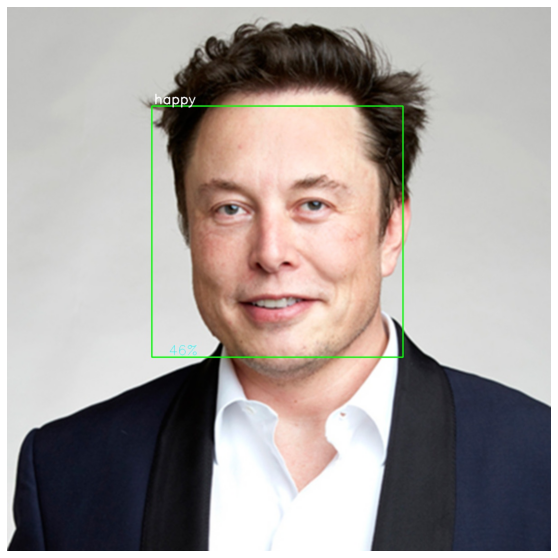

In [120]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

image = cv2.imread("C:/Users/fahad/emotion_recognition/elon_musk.jpg")
height, width = image.shape[:2]
resized_image = cv2.resize(image,(3*width, 3*height), interpolation = cv2.INTER_CUBIC)

fig = plt.gcf()
fig.set_size_inches(18, 10)
plt.axis("off")
plt.imshow(cv2.cvtColor(resized_image, cv2.COLOR_BGR2RGB))
plt.show()